In [583]:
import pandas as pd
datos = pd.read_csv("lotohistorial-google.csv")

In [584]:
datos.head()

,fecha,dia-de-la-semana,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador
0,21/10/2023,sabado,4,27,23,36,13,1,500000,False
1,28/10/2023,sabado,19,30,12,8,3,17,533000,False
2,31/10/2023,martes,35,28,4,20,1,25,533000,False
3,4/11/2023,sabado,23,32,16,11,31,4,594131,False
4,7/11/2023,martes,9,3,18,11,33,27,594131,False


In [585]:
# Colocamos la columna ganador con 1 y 0
dummies_gandor = pd.get_dummies(data=datos["ganador"], columns=["ganador"], dtype=int, drop_first=True)
datos["ganador"] = dummies_gandor

### AGREGAMOS CAMPOS

In [586]:
# Media, desviación estándar y suma de las posiciones
datos['media_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].mean(axis=1)
datos['desviacion_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].std(axis=1)
datos['suma_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].sum(axis=1)

# Frecuencia histórica de cada número
frecuencia_historica = datos.loc[:, "posicion-1":"posicion-6"].stack().value_counts()
frecuencia_dict = frecuencia_historica.to_dict()

datos['frecuencia_historica'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
    lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila), axis=1
)

# Posición más alta y más baja
datos['posicion_mas_alta'] = datos.loc[:, "posicion-1":"posicion-6"].max(axis=1)
datos['posicion_mas_baja'] = datos.loc[:, "posicion-1":"posicion-6"].min(axis=1)

# Diferencia entre números consecutivos
for i in range(1, 6):  # Iterar de la primera posición a la penúltima
    datos[f'diferencia_posicion_{i}_{i+1}'] = datos[f'posicion-{i+1}'] - datos[f'posicion-{i}']

# Rango (número más alto menos el más bajo)
datos['rango_posiciones'] = datos['posicion_mas_alta'] - datos['posicion_mas_baja']

# Mediana de las posiciones
datos['mediana_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].median(axis=1)

# Número de ocurrencias (frecuencia relativa) de cada número dentro de cada combinación
# Este valor es la suma de frecuencias de cada número dividido entre el total de posiciones
datos['frecuencia_media'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
    lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila) / 6, axis=1
)

# Posiciones pares vs impares
datos['suma_pares'] = datos.loc[:, ["posicion-1", "posicion-3", "posicion-5"]].sum(axis=1)
datos['suma_impares'] = datos.loc[:, ["posicion-2", "posicion-4", "posicion-6"]].sum(axis=1)
datos['diferencia_pares_impares'] = datos['suma_pares'] - datos['suma_impares']


### Borramos campos

In [587]:
datos = datos.drop(columns="dia-de-la-semana")
datos = datos.drop(columns="fecha")
datos = datos.drop(columns="premio")
datos = datos.drop(columns=["posicion-1", "posicion-2", "posicion-3", "posicion-4", "posicion-5", "posicion-6"])

In [588]:
datos.head()

,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja,diferencia_posicion_1_2,diferencia_posicion_2_3,diferencia_posicion_3_4,diferencia_posicion_4_5,diferencia_posicion_5_6,rango_posiciones,mediana_posiciones,frecuencia_media,suma_pares,suma_impares,diferencia_pares_impares
0,0,17.333333,13.691847,104,124,36,1,23,-4,13,-23,-12,35,18.0,20.666667,40,64,-24
1,0,14.833333,9.453394,89,109,30,3,11,-18,-4,-5,14,27,14.5,18.166667,34,55,-21
2,0,18.833333,13.585532,113,132,35,1,-7,-24,16,-19,24,34,22.5,22.000000,40,73,-33
3,0,19.500000,11.184811,117,121,32,4,9,-16,-5,20,-27,28,19.5,20.166667,70,47,23
4,0,16.833333,11.426577,101,130,33,3,-6,15,-7,22,-6,30,14.5,21.666667,60,41,19


In [589]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ganador                   118 non-null    int64  
 1   media_posiciones          118 non-null    float64
 2   desviacion_posiciones     118 non-null    float64
 3   suma_posiciones           118 non-null    int64  
 4   frecuencia_historica      118 non-null    int64  
 5   posicion_mas_alta         118 non-null    int64  
 6   posicion_mas_baja         118 non-null    int64  
 7   diferencia_posicion_1_2   118 non-null    int64  
 8   diferencia_posicion_2_3   118 non-null    int64  
 9   diferencia_posicion_3_4   118 non-null    int64  
 10  diferencia_posicion_4_5   118 non-null    int64  
 11  diferencia_posicion_5_6   118 non-null    int64  
 12  rango_posiciones          118 non-null    int64  
 13  mediana_posiciones        118 non-null    float64
 14  frecuencia

In [590]:
datos.describe()

,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja,diferencia_posicion_1_2,diferencia_posicion_2_3,diferencia_posicion_3_4,diferencia_posicion_4_5,diferencia_posicion_5_6,rango_posiciones,mediana_posiciones,frecuencia_media,suma_pares,suma_impares,diferencia_pares_impares
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.067797,19.080508,10.897441,114.483051,118.338983,32.830508,5.016949,1.779661,-3.016949,1.118644,0.822034,-0.279661,27.813559,19.237288,19.723164,55.932203,58.550847,-2.618644
std,0.252469,4.315641,2.229884,25.893844,10.227515,4.559774,3.802795,16.197043,14.373517,16.213411,15.365424,15.617701,5.229681,6.129901,1.704586,19.481189,19.253859,28.809103
min,0.000000,9.833333,4.718757,59.000000,96.000000,15.000000,1.000000,-29.000000,-34.000000,-36.000000,-31.000000,-34.000000,12.000000,6.000000,16.000000,7.000000,12.000000,-73.000000
25%,0.000000,16.041667,9.511379,96.250000,111.000000,30.000000,2.000000,-11.750000,-15.000000,-9.000000,-9.750000,-11.000000,25.000000,14.125000,18.500000,42.000000,45.500000,-23.750000
50%,0.000000,19.083333,10.978766,114.500000,118.500000,34.000000,4.000000,3.500000,-3.500000,1.000000,1.000000,-1.000000,28.000000,19.000000,19.750000,56.000000,59.500000,-2.000000
75%,0.000000,22.166667,12.542926,133.000000,125.000000,36.000000,7.000000,13.000000,7.000000,14.000000,12.000000,11.000000,31.750000,24.375000,20.833333,68.750000,71.000000,19.000000
max,1.000000,28.166667,15.504838,169.000000,140.000000,38.000000,19.000000,31.000000,33.000000,34.000000,35.000000,31.000000,37.000000,32.000000,23.333333,99.000000,107.000000,57.000000


array([[<Axes: title={'center': 'ganador'}>,
        <Axes: title={'center': 'media_posiciones'}>,
        <Axes: title={'center': 'desviacion_posiciones'}>,
        <Axes: title={'center': 'suma_posiciones'}>],
       [<Axes: title={'center': 'frecuencia_historica'}>,
        <Axes: title={'center': 'posicion_mas_alta'}>,
        <Axes: title={'center': 'posicion_mas_baja'}>,
        <Axes: title={'center': 'diferencia_posicion_1_2'}>],
       [<Axes: title={'center': 'diferencia_posicion_2_3'}>,
        <Axes: title={'center': 'diferencia_posicion_3_4'}>,
        <Axes: title={'center': 'diferencia_posicion_4_5'}>,
        <Axes: title={'center': 'diferencia_posicion_5_6'}>],
       [<Axes: title={'center': 'rango_posiciones'}>,
        <Axes: title={'center': 'mediana_posiciones'}>,
        <Axes: title={'center': 'frecuencia_media'}>,
        <Axes: title={'center': 'suma_pares'}>],
       [<Axes: title={'center': 'suma_impares'}>,
        <Axes: title={'center': 'diferencia_pares_

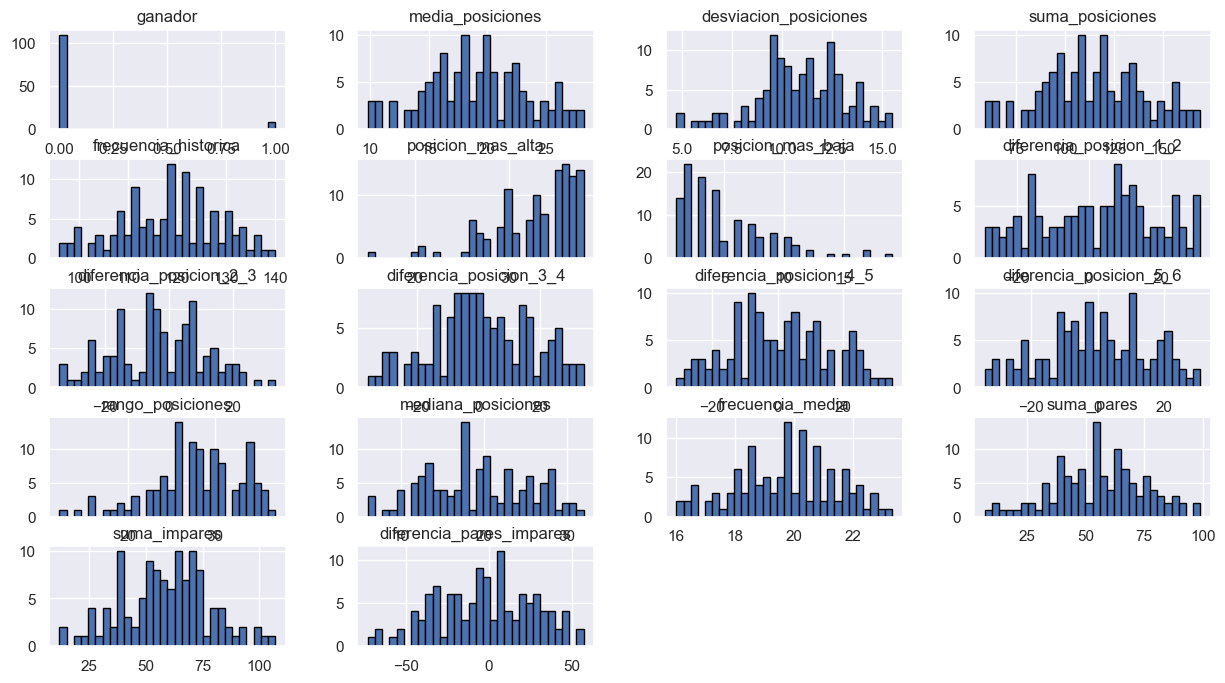

In [591]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: >

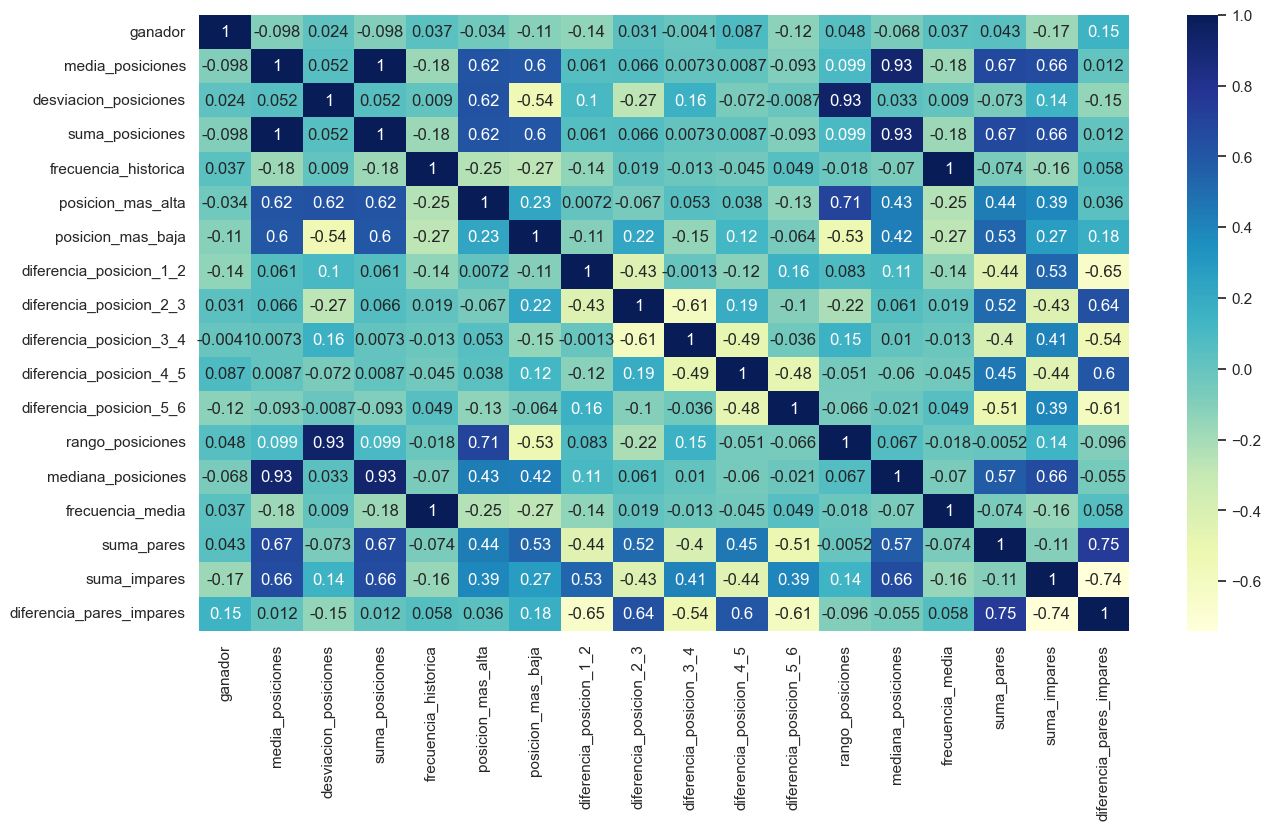

In [592]:
import seaborn as sb
sb.set_theme(rc={'figure.figsize':(15,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")


In [593]:
datos.corr()["ganador"].sort_values(ascending=False)

ganador                     1.000000
diferencia_pares_impares    0.145653
diferencia_posicion_4_5     0.086860
rango_posiciones            0.048496
suma_pares                  0.042649
frecuencia_media            0.037364
frecuencia_historica        0.037364
diferencia_posicion_2_3     0.030938
desviacion_posiciones       0.024095
diferencia_posicion_3_4    -0.004070
posicion_mas_alta          -0.034480
mediana_posiciones         -0.068472
media_posiciones           -0.097878
suma_posiciones            -0.097878
posicion_mas_baja          -0.108035
diferencia_posicion_5_6    -0.123042
diferencia_posicion_1_2    -0.136354
suma_impares               -0.174785
Name: ganador, dtype: float64

In [594]:
datos.head()

,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja,diferencia_posicion_1_2,diferencia_posicion_2_3,diferencia_posicion_3_4,diferencia_posicion_4_5,diferencia_posicion_5_6,rango_posiciones,mediana_posiciones,frecuencia_media,suma_pares,suma_impares,diferencia_pares_impares
0,0,17.333333,13.691847,104,124,36,1,23,-4,13,-23,-12,35,18.0,20.666667,40,64,-24
1,0,14.833333,9.453394,89,109,30,3,11,-18,-4,-5,14,27,14.5,18.166667,34,55,-21
2,0,18.833333,13.585532,113,132,35,1,-7,-24,16,-19,24,34,22.5,22.000000,40,73,-33
3,0,19.500000,11.184811,117,121,32,4,9,-16,-5,20,-27,28,19.5,20.166667,70,47,23
4,0,16.833333,11.426577,101,130,33,3,-6,15,-7,22,-6,30,14.5,21.666667,60,41,19


### Numero ganadores

In [595]:
# # Filtrar los datos donde "True" es 1 (ganador)
# ganadores = datos[datos["ganador"] == 1]  # Cambia 'True' si ya renombraste la columna

# # Seleccionar las columnas de las posiciones
# numeros_ganadores = ganadores.loc[:, "posicion-1":"posicion-6"]

# # Convertir los datos de las posiciones en un formato largo para contar las frecuencias
# numeros_ganadores_melted = numeros_ganadores.melt(var_name="posicion", value_name="numero")

# # Ver la gráfica de conteo de números ganadores
# sb.countplot(x="numero", data=numeros_ganadores_melted)


# Empezamos el entrenamiento

In [596]:
X = datos.drop(columns="ganador")
y = datos["ganador"]

In [597]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

## Arbol de desicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [599]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.875

In [600]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1, 15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent, y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones)
    print(f"Resultado para {i} arboles: {exactitud}")
    resultados.append(exactitud)


Resultado para 1 arboles: 0.9166666666666666
Resultado para 2 arboles: 0.9166666666666666
Resultado para 3 arboles: 0.9166666666666666
Resultado para 4 arboles: 0.9583333333333334
Resultado para 5 arboles: 0.9583333333333334
Resultado para 6 arboles: 0.9583333333333334
Resultado para 7 arboles: 0.9583333333333334
Resultado para 8 arboles: 0.9166666666666666
Resultado para 9 arboles: 0.875
Resultado para 10 arboles: 0.9166666666666666
Resultado para 11 arboles: 0.875
Resultado para 12 arboles: 0.9583333333333334
Resultado para 13 arboles: 0.9166666666666666
Resultado para 14 arboles: 0.9166666666666666


<Axes: >

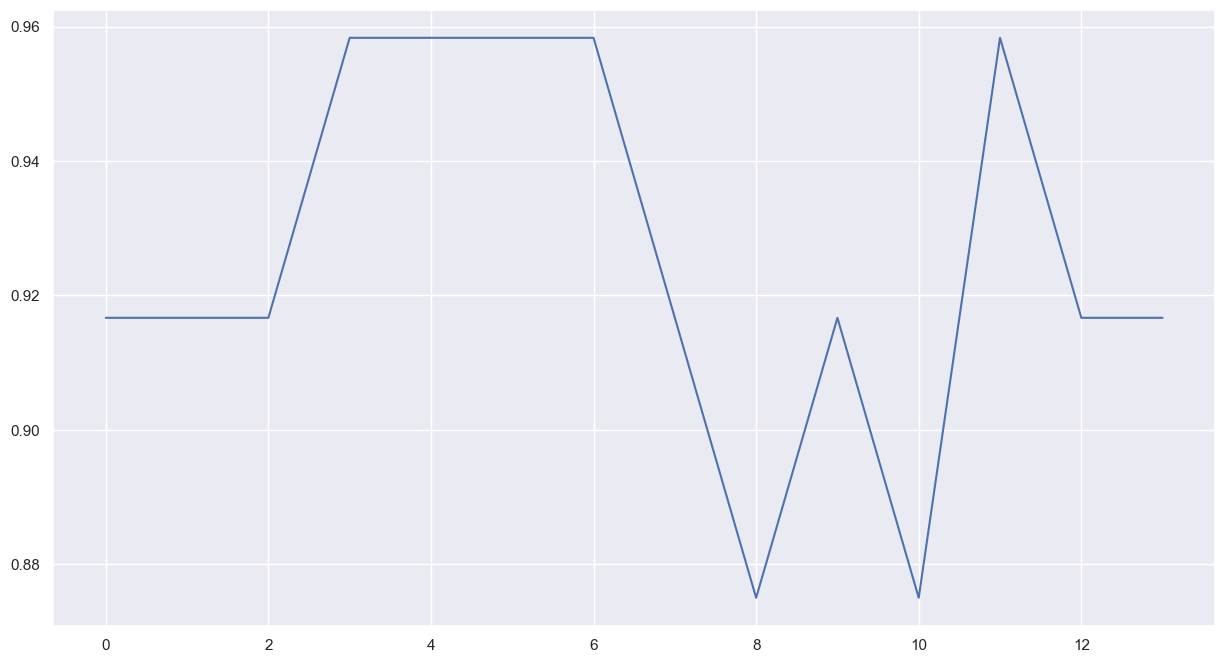

In [601]:
sb.lineplot(data=resultados)

In [602]:
# modelo = DecisionTreeClassifier(max_depth=2)
# modelo.fit(X_ent, y_ent)
# predicciones = modelo.predict(X_pru)
# exactitud = accuracy_score(y_pru, predicciones)

modelo = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)




In [603]:
# # Ahora veremos el reporte de clasificacion
# from sklearn.metrics import classification_report

# print(classification_report(y_pru, predicciones))
from sklearn.metrics import classification_report

# Imprimir reporte de clasificación
print(classification_report(y_pru, predicciones))


              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.00      0.00      0.00         1

    accuracy                           0.83        24
   macro avg       0.48      0.43      0.45        24
weighted avg       0.91      0.83      0.87        24



In [604]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,20,3
Real: Si,1,0


[Text(0.4444444444444444, 0.875, 'frecuencia_historica <= 118.5\n0.5\n94\n[47.0, 47.0]\nGano'),
 Text(0.2222222222222222, 0.625, 'suma_posiciones <= 59.5\n0.339\n46\n[24.31, 6.714]\nperdio'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, '0.0\n1\n[0.0, 6.714]\nGano'),
 Text(0.3333333333333333, 0.375, '-0.0\n45\n[24.31, 0.0]\nperdio'),
 Text(0.6666666666666666, 0.625, 'suma_pares <= 46.5\n0.461\n48\n[22.69, 40.286]\nGano'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, '0.0\n15\n[8.103, 0.0]\nperdio'),
 Text(0.7777777777777778, 0.375, 'rango_posiciones <= 25.5\n0.39\n33\n[14.586, 40.286]\nGano'),
 Text(0.6666666666666666, 0.125, '0.0\n6\n[3.241, 0.0]\nperdio'),
 Text(0.8888888888888888, 0.125, '0.343\n27\n[11.345, 40.286]\nGano')]

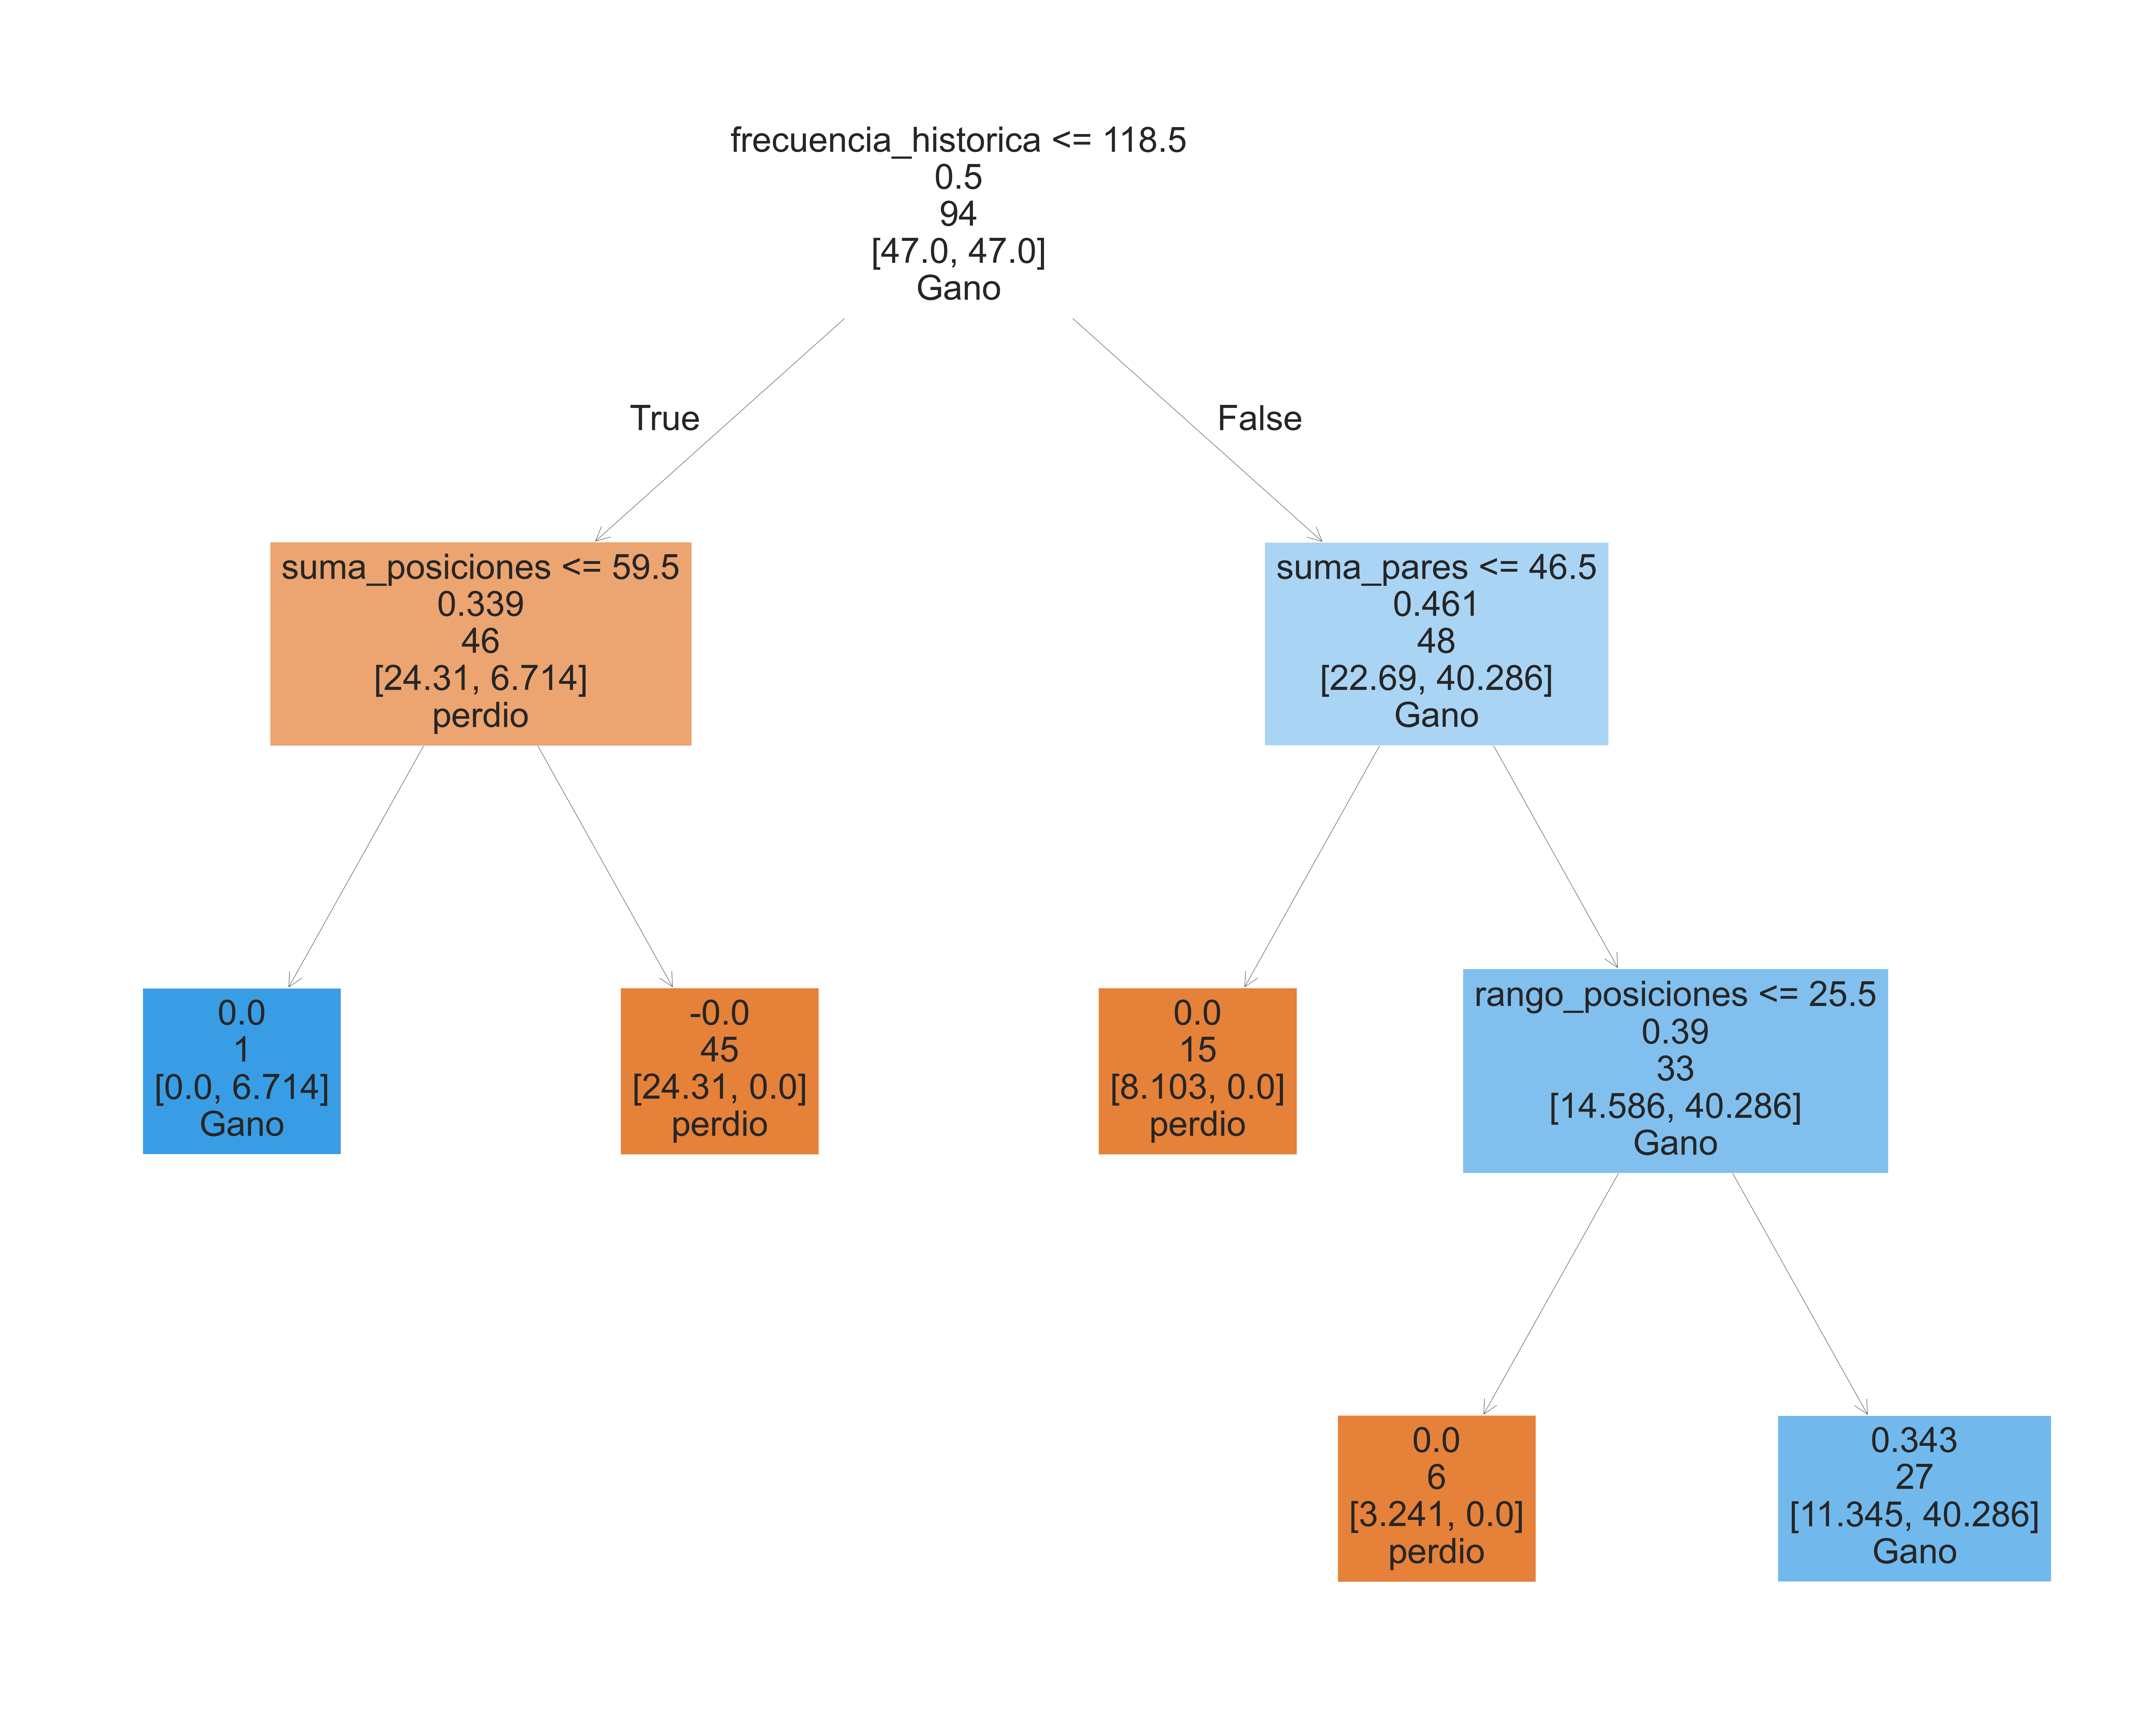

In [605]:
# lo bueno de este modelo esque podemos graficarlo
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80)) # le indicamos el tamano
plot_tree(
    modelo, 
    feature_names=X.columns, # las columnas de los datos
    class_names=["perdio", "Gano"], # debemos especificar le nombre de las clases, en orden ascendiente, sobrevivio o no
                            # la columna se llama survived y tiene 1 y 0
    filled=True, # para que se vea mejor la grafica rellenando los recuadros
    label="none" # Para que no nos agregue datos que hace que se vean mas confusos 
    )

